In [8]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

Import Dataset

Train set

In [9]:
import pandas as pd

train_set_path = (
    "/home/jbct/Projects/thesis/db-ocsvm/data/processed/NSL-KDD/train_set_full.csv"
)
train_df = pd.read_csv(train_set_path)
train_df = train_df.sample(frac=0.15, random_state=42).reset_index(drop=True)
print(train_df.shape)
train_df.head()

(10101, 122)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,5.833486e-07,2.572642e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,2.702969e-07,2.616156e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,1.579751e-07,2.145141e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,5.311733e-07,2.839830e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000047,1.223220e-06,2.580276e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


splitting dataset

In [10]:
from sklearn.model_selection import train_test_split

X_train_full = train_df.values
X_train, X_val = train_test_split(train_df, test_size=0.2, random_state=42)
X_train = X_train.values
X_val = X_val.values
print(X_train.shape, X_val.shape, X_train_full.shape)

(8080, 122) (2021, 122) (10101, 122)


In [11]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor)
val_dataset = TensorDataset(X_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

# Create data loaders
# train_dataset = TensorDataset(X_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

Train autoencoder

In [12]:
from models import DeepSparseDenoisingAutoencoder

# Initialize the autoencoder
input_dim = X_train.shape[1]
autoencoder = DeepSparseDenoisingAutoencoder(
    input_dim=input_dim,
    hidden_dims=[100, 80, 55],
    activation="relu",
    dropout_rate=0.2,
    noise_factor=0.1,
)

In [13]:
from utils import train_autoencoder

# Train the model
history = train_autoencoder(
    autoencoder, train_loader, val_loader=val_loader, epochs=10, save_plots=False
)

Epoch 1/10 [Train]:   2%|▏         | 1/64 [00:00<00:07,  8.75it/s, batch_loss=0.263]

Epoch 1/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 91.03it/s, batch_loss=0.249] 


Epoch 1/10, Train Loss: 0.2549, Val Loss: 0.2387



Epoch 2/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 186.63it/s, batch_loss=0.214]


Epoch 2/10, Train Loss: 0.2339, Val Loss: 0.2069



Epoch 3/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 119.98it/s, batch_loss=0.0616]


Epoch 3/10, Train Loss: 0.1500, Val Loss: 0.0589



Epoch 4/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 160.03it/s, batch_loss=0.0237]


Epoch 4/10, Train Loss: 0.0400, Val Loss: 0.0198



Epoch 5/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 139.00it/s, batch_loss=0.0245]


Epoch 5/10, Train Loss: 0.0299, Val Loss: 0.0183



Epoch 6/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 173.23it/s, batch_loss=0.0249]


Epoch 6/10, Train Loss: 0.0266, Val Loss: 0.0177



Epoch 7/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 146.65it/s, batch_loss=0.0218]


Epoch 7/10, Train Loss: 0.0243, Val Loss: 0.0175



Epoch 8/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 160.06it/s, batch_loss=0.0249]


Epoch 8/10, Train Loss: 0.0228, Val Loss: 0.0173



Epoch 9/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 166.99it/s, batch_loss=0.0227]


Epoch 9/10, Train Loss: 0.0217, Val Loss: 0.0171



Epoch 10/10 [Train]: 100%|██████████| 64/64 [00:00<00:00, 118.59it/s, batch_loss=0.0224]


Epoch 10/10, Train Loss: 0.0207, Val Loss: 0.0169



Extract bottleneck features for OCSVM

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_bottleneck = (
    autoencoder.get_bottleneck_representation(X_train_tensor.to(device)).cpu().numpy()
)

print(f"Original data shape: {X_train.shape}")
print(f"Bottleneck representation shape: {X_train_bottleneck.shape}")

Original data shape: (8080, 122)
Bottleneck representation shape: (8080, 55)


import test set

In [15]:
test_set_path = (
    "/home/jbct/Projects/thesis/db-ocsvm/data/processed/NSL-KDD/test_set.csv"
)
test_df = pd.read_csv(test_set_path)
test_df = test_df.sample(frac=0.5, random_state=42)
print(test_df.shape)
test_df.head()

(11272, 125)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary,attack_categorical,attack_class
6186,0.171483,0.000000e+00,3.358939e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1,processtable,DoS
247,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1,neptune,DoS
4343,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,mscan,Probe
16283,0.000000,1.231916e-07,1.779322e-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,normal,normal
15889,0.000000,7.608895e-08,1.114557e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1,snmpgetattack,R2L


In [16]:
from utils import evaluate_reconstruction_error

X_test = test_df.drop(
    columns=["attack_binary", "attack_categorical", "attack_class"]
).values
y_test = test_df["attack_binary"].values
y_test_class = test_df["attack_class"]
print(X_test.shape, y_test.shape)
results = evaluate_reconstruction_error(autoencoder, X_test, y_test, device)

(11272, 122) (11272,)
Avg Reconstruction Error (Normal): 0.0132
Avg Reconstruction Error (Anomaly): 0.0536
Error Ratio (Anomaly/Normal): 4.06x


export as onnx

In [17]:
from utils import export_autoencoder_to_onnx

export_autoencoder_to_onnx(autoencoder, input_dim)

Model exported to /home/jbct/Projects/thesis/db-ocsvm/models/autoencoder/deep_sparse_denoising.onnx
Model verified - ONNX export successful!


training and testing on the latent representations

In [18]:
from utils import extract_features

# Extract features from training data (normal only)
train_features = extract_features(autoencoder, train_loader, device)

In [19]:
X_test_tensor = torch.FloatTensor(X_test)
X_tensor_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(X_tensor_dataset, batch_size=128)
test_features = extract_features(autoencoder, test_loader, device)
print(train_features.shape, test_features.shape)

(8080, 55) (11272, 55)


In [20]:
from sklearn.svm import OneClassSVM


ocsvm = OneClassSVM(kernel="rbf", gamma="auto", nu=0.2, verbose=True)

ocsvm.fit(train_features)

[LibSVM].
*
optimization finished, #iter = 1574
obj = 1303277.143616, rho = 1613.223896
nSV = 1617, nBSV = 1616


OneClassSVM(gamma='auto', nu=0.2, verbose=True)

In [21]:
y_pred = ocsvm.predict(test_features)

Confusion Matrix:


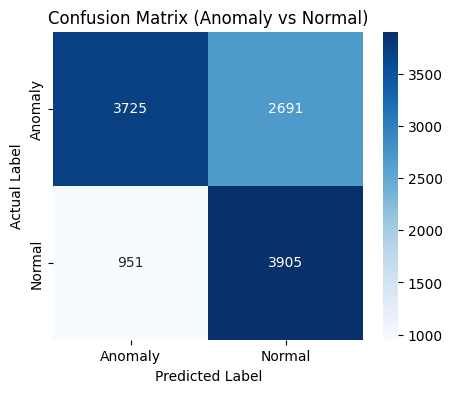

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])

# Print the confusion matrix
print("Confusion Matrix:")


def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()


plot_confusion_matrix(cm, ["Anomaly", "Normal"], "Confusion Matrix (Anomaly vs Normal)")

In [23]:
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Anomaly", "Normal"]))

precision = precision_score(y_test, y_pred, pos_label=-1)
recall = recall_score(y_test, y_pred, pos_label=-1)
f1 = f1_score(y_test, y_pred, pos_label=-1)
acc = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {acc}")

Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.80      0.58      0.67      6416
      Normal       0.59      0.80      0.68      4856

    accuracy                           0.68     11272
   macro avg       0.69      0.69      0.68     11272
weighted avg       0.71      0.68      0.68     11272

Precision: 0.7966210436270317
Recall: 0.5805798004987531
F1 Score: 0.6716552470248828
Accuracy: 0.6768985095812633


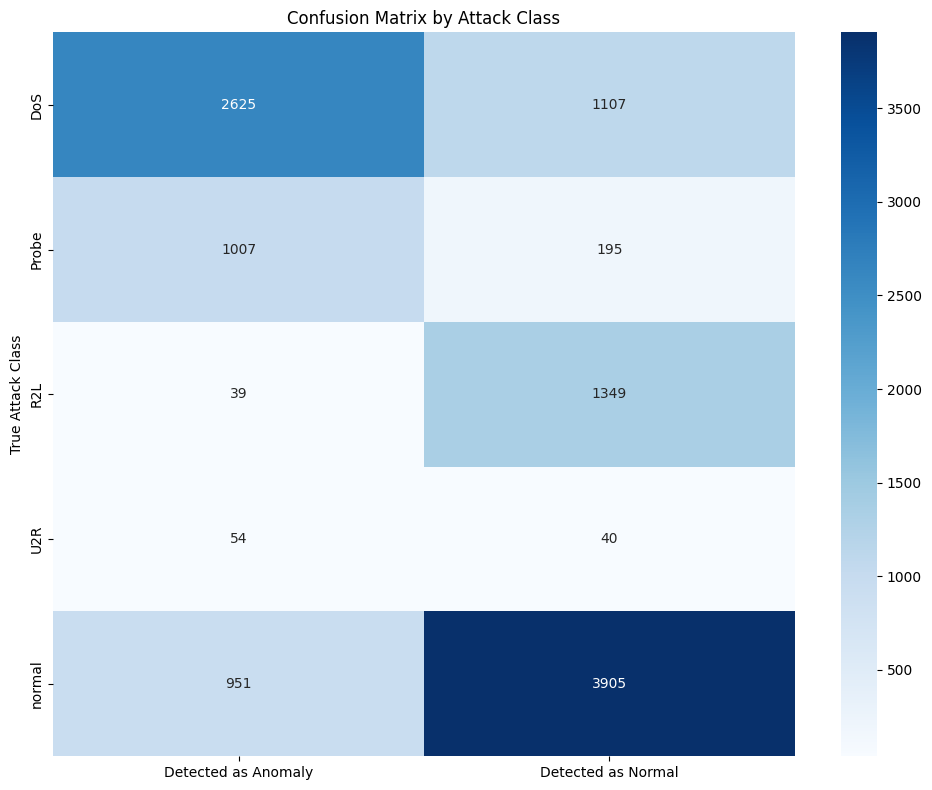

In [24]:
def create_multiclass_cm(y_true_class, y_pred_binary):
    """
    Create a confusion matrix showing how each attack class was classified.

    For attack classes (DoS, Probe, R2L, U2R), correct detection is when y_pred = -1 (anomaly)
    For normal class, correct detection is when y_pred = 1 (normal)
    """
    classes = np.unique(y_true_class)
    cm = np.zeros((len(classes), 2))

    for i, cls in enumerate(classes):
        # Get predictions for this class
        cls_indices = y_true_class == cls
        preds = y_pred_binary[cls_indices]

        # Count correct and incorrect predictions
        if cls == "normal":
            cm[i, 0] = np.sum(preds == -1)  # incorrectly detected as anomaly
            cm[i, 1] = np.sum(preds == 1)  # correctly detected as normal
        else:
            cm[i, 0] = np.sum(preds == -1)  # correctly detected as anomaly
            cm[i, 1] = np.sum(preds == 1)  # incorrectly detected as normal

    return cm, classes


# Create and plot the multi-class confusion matrix
cm_multi, classes = create_multiclass_cm(y_test_class, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_multi,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Detected as Anomaly", "Detected as Normal"],
    yticklabels=classes,
)
plt.ylabel("True Attack Class")
plt.title("Confusion Matrix by Attack Class")
plt.tight_layout()
plt.show()

In [25]:
# Calculate detection rates for each class
print("Detection rates by class:")
class_metrics = {}
for cls in np.unique(y_test_class):
    # Get indices for this class
    class_indices = y_test_class == cls

    # True values and predictions for this class
    y_true_cls = y_test[class_indices]
    y_pred_cls = y_pred[class_indices]

    # Calculate metrics
    if cls == "Normal":
        # For normal class, we want to detect 1 (normal)
        correct = np.sum((y_pred_cls == 1))
        precision = precision_score(
            y_true_cls, y_pred_cls, pos_label=1, zero_division=0
        )
        recall = recall_score(y_true_cls, y_pred_cls, pos_label=1, zero_division=0)
    else:
        # For attack classes, we want to detect -1 (anomaly)
        correct = np.sum((y_pred_cls == -1))
        precision = precision_score(
            y_true_cls, y_pred_cls, pos_label=-1, zero_division=0
        )
        recall = recall_score(y_true_cls, y_pred_cls, pos_label=-1, zero_division=0)

    total = len(y_pred_cls)
    detection_rate = correct / total
    f1 = f1_score(
        y_true_cls, y_pred_cls, pos_label=-1 if cls != "Normal" else 1, zero_division=0
    )

    class_metrics[cls] = {
        "detection_rate": detection_rate,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "count": total,
        "correctly_detected": correct,
    }

    print(f"{cls}: {detection_rate:.4f} ({correct}/{total})")

Detection rates by class:
DoS: 0.7034 (2625/3732)
Probe: 0.8378 (1007/1202)
R2L: 0.0281 (39/1388)
U2R: 0.5745 (54/94)
normal: 0.1958 (951/4856)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to visualize the bottleneck features
tsne = TSNE(n_components=2, random_state=42)
test_features_2d = tsne.fit_transform(test_features)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    test_features_2d[:, 0], test_features_2d[:, 1], c=y_test, cmap="viridis", alpha=0.6
)
plt.colorbar(scatter, label="Class")
plt.title("t-SNE Visualization of Bottleneck Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.savefig("tsne_visualization.png")
plt.close()

# Visualization of bottleneck features with OCSVM decision boundary
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    test_features_2d[:, 0],
    test_features_2d[:, 1],
    c=y_pred,
    cmap="coolwarm",
    alpha=0.6,
)
plt.colorbar(scatter, label="OCSVM Prediction")
plt.title("OCSVM Decision Boundary on t-SNE Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")